**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# **Cleaning and Exploring Data with Pandas**
In this project, we will investigate restaurant food safety scores for restaurants in San Francisco. The scores and violation information have been made available by the San Francisco Department of Public Health. The main goal for this assignment is to walk through the process of Data Cleaning and EDA.

As we clean and explore this data, you will gain practice with:

*  Reading simple csv files and using Pandas
*  Working with data at different levels of granularity
*  Identifying the type of data collected, missing values, anomalies, etc.
*  Exploring characteristics and distributions of individual variables

The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.   

Make sure your code passes all the embedded doctests.

**Step 1:**  
Mount your Google drive and upload the files:  
- ins.csv.bz2 
- bus.sv.bz2 
- sf_zipcodes.json
- sf.png 

Note, the datasets are captured as compressed csv files, so if you want to inspect them as a spreadsheet, you will need to decompress them.  The files can be downloaded from the materials section for this course in the LMS. 

In [1]:
#Download the provided data files and upload to your drive.
#Mount your drive and copy the files to your working directory 
#   or change directory to where the files are located.

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/ML_S23-Mauro/MachineLearning/EDA/EDA Restaurant Project

Mounted at /content/drive
/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/EDA/EDA Restaurant Project


**Step 2:**  
Import the following Python libraries:
- numpy
- pandas
- matplotlib (pyplot)
- seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
# import None

**Step 3:**  
Read the business and inspection datasets into a Pandas dataframe.  
- bus.csv.bz2
- ins.csv.bz2


In [ ]:
bus = pd.read_csv("bus.csv.bz2")
ins = pd.read_csv("ins.csv.bz2")

## **Part-A:  Examining the Business Dataset**
From its name alone, we expect the bus.csv file to contain business information about the restaurants. Let's investigate this dataset further.

**Step A-1:**   
Check out at least the first 5 examples of the business dataset (from bus.csv.bz2) using the appropriate Pandas function.  

You should see the following information:  
![alt text](https://drive.google.com/uc?id=1Coj54dt26Nmt3bdsIMiQjEZXXnEvkGeB)


In [ ]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


**Step A-2:**  

The bus dataframe contains a column called business id column which probably corresponds to a unique business id. However, let's first rename that column to bid for easier handling. Use the appropriate Pandas function to modify the bus dataframe by renaming that column to "bid", then check the first 5 rows of your updated dataset. 

Your output should look like this:
![alt text](https://drive.google.com/uc?id=1qUqOYekaWFUnXyNpL54hXf6NAvjaNcMH)

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

In [ ]:
bus = bus.rename(columns={"business id column": "bid"})
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


**Step A-3:**

In the two cells below you will be creating a **series** with given specifications.   

Create a series where the index is the `name` of the business and the value is the number of records with that `name`. Order the series in descending order by count. The first 20 outputs should look like the following list:  
- Peet's Coffee & Tea                                       20
- Starbucks Coffee                                          13
- McDonald's                                                10
- Jamba Juice                                               10
- Proper Food                                                9
- STARBUCKS                                                  9
- Specialty's Cafe & Bakery                                  8
- Mixt Greens/Mixt                                           8
- The Organic Coup                                           7
- Starbucks                                                  7
- Whole Foods Market                                         7
- Blue Bottle Coffee                                         7
- Philz Coffee                                               7
- Lee's Deli                                                 6
- BlueStar Refreshment Services @ Uber Technologies, Inc     6
- Bon Appetit @ Twitter                                      6
- La Boulangerie De San Francisco                            5
- STARBUCKS COFFEE                                           5
- Annie's Hot Dogs & Pretzels                                5
- JW Marriott SF Union Square                                5

Make sure your code passes the embedded doctests.

Hints:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts#pandas.DataFrame.value_counts   
https://pandas.pydata.org/docs/reference/api/pandas.Index.sort_values.html?highlight=sort_values#pandas.Index.sort_values



In [ ]:
name_counts = bus['name'].value_counts(ascending=False).to_dict()

import doctest

"""
  >>> print(name_counts['Starbucks Coffee'])
  13
  >>> print(name_counts['Philz Coffee'])
  7
  >>> print(name_counts['JW Marriott SF Union Square'])
  5
  >>> print(name_counts['Sunset Bakery'])
  1
"""

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.8/doctest.py", line 1487, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=4)

**Step A-4:**  

Create a series where the index is the `address` of the business and the value is the number of records with that address. Order the series in descending order by count.  What top 5 location have the most businesses?  

Make sure your code passes the embedded doctests.  


In [ ]:
address_counts = bus['address'].value_counts(ascending=False).to_dict()


import doctest

"""
  >>> print(address_counts['103 Horne Ave'])
  14
  >>> print(address_counts['3251 20th Ave'])
  17
  >>> print(address_counts['149 2nd St'])
  1
"""

doctest.testmod()


TestResults(failed=0, attempted=3)

**Question Part A:**

Based on your first impressions of the dataset, what do you think each record represents?    

Choose from the following options and submit your answer in the assignment post.


1.   One location of a restaurant.
2.   A chain of restaurants.
3.   A city block.



## **Part-B:  Cleaning the Business Dataset**. 

**Step B-1:**

We are now going to create a series of the zip codes in the dataset. In the cell below, create a series where the index is the postal code and the value is the number of records with that postal code. Order the series in **descending** order by count. Do you notice any odd postal codes?  

Make sure your code passes the embedded doctests.


Hints:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts#pandas.DataFrame.value_counts   
https://pandas.pydata.org/docs/reference/api/pandas.Index.sort_values.html?highlight=sort_values#pandas.Index.sort_values  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html  



In [ ]:
postal_counts = bus['postal_code'].value_counts(ascending=False).astype(str).to_dict()

import doctest

"""
  >>> print(postal_counts['94103'])
  562
  >>> print(postal_counts['94114'])
  200
  >>> print(postal_counts['00000'])
  1
  >>> print(postal_counts['CA'])
  2
  >>> print(postal_counts['-9999'])
  194
"""

doctest.testmod()

TestResults(failed=0, attempted=5)

**Step B-2:**

Print out a series of valid San Francisco zip codes.  You can get a json formatted file of the zip codes from the assignment post or from the link [here](https://drive.google.com/file/d/1b6o5QbMYfcPopa_C05HutYllQg1YIt0t/view?usp=sharing).  

Make sure your code passes the embedded doctests.

Hints:   
https://pandas.pydata.org/pandas-docs/version/1.1.3/reference/api/pandas.read_json.html 


In [ ]:
valid_postals = pd.read_json("sf_zipcodes.json", dtype="str")['zip_codes']

import doctest

"""
  >>> print(valid_postals[10])
  94114
  >>> print(valid_postals[3])
  94105
  >>> print(valid_postals[43])
  94159
"""

doctest.testmod()

TestResults(failed=0, attempted=3)

**Step B-3:**  
Construct a DataFrame containing only the businesses which **do not** have valid ZIP codes.   
Make sure your code passes the doctest.

The first five rows should look like this:
![alt text](https://drive.google.com/uc?id=1wUM4VkZ2vFWYxvEHtD5kpThThssB8est)

Hints:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html  

In [ ]:
invalid_postals_df = bus[~bus['postal_code'].isin(list(valid_postals))]
invalid_postals_df.head(20)


import doctest

"""
  >>> print(invalid_postals_df[['postal_code']].iloc[1])
  postal_code    94105-1420
  Name: 68, dtype: object
  >>> print(invalid_postals_df[['address']].iloc[1])
  address    1 MARKET ST. FL
  Name: 68, dtype: object
  >>> print(invalid_postals_df[['address']].iloc[12])
  address    10 29th St
  Name: 322, dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=3)

You may notice that many of these invalid postal codes share a common value of -9999, which could signify a missing postal code. Could these records have anything else in common, such as their addresses?

**Step B-4:**

In the following cell, construct a series that counts the number of businesses at each address that have this single -9999 postal code value. Order the series in descending order by count.

It should look like the following list:  
- Off The Grid                  39
- Off the Grid                  10
- OTG                            4
- OFF THE GRID                   3
- Approved Private Locations     3  

Make sure your code passes the doctests.

In [ ]:
missing_postal_address_count = invalid_postals_df[invalid_postals_df['postal_code'] == '-9999']['address'].value_counts(ascending=False)

print(missing_postal_address_count)

missing_postal_address_count.head()

import doctest

"""
  >>> print(missing_postal_address_count[0])
  39
  >>> print(missing_postal_address_count[2])
  4
  >>> print(missing_postal_address_count[5])
  3
  >>> print(missing_postal_address_count[120])
  1
"""

doctest.testmod()

Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
                              ..
Macys - Geary Entrance         1
1001 Potrero Ave               1
550 A Gene Friend Way          1
550 Gene Friends Way           1
1 franklin Ct                  1
Name: address, Length: 135, dtype: int64


TestResults(failed=0, attempted=4)

This shows us something interesting: if we were to remove these food businesses, a particular class of business will be affected. Namely, businesses like food trucks that do not have a fixed location would be excluded in our analysis.

**Step B-5:**

Since we will not be removing the missing postal codes, we will simply modify them to say "None" instead of -9999 in a new column. Make a new column in the `bus` dataframe and call it `new_postal`. This column will contain all postal codes the original column, with a few modifications. 

Make sure your code passes the doctests.


*   For any of the postal code entries that were not a valid San Fransisco ZIP Code (according to `valid_postals`) set the entry to `None`.
*   You may have noticed that some postal codes contained 9 digits, so only keep the first 5 digits of all postal codes.

Make sure your code passes the doctests.

The first five rows should look like this:

![alt text](https://drive.google.com/uc?id=1jw_z0ODrXE5me7a6fuxRipR-15hOujmJ)

Make sure your code passes the doctests.


In [ ]:
string = "94117-3504"
lst = (list(string)[:5])

new_string = ""
for i in lst:
  new_string += i
  
print(new_string)

94117


In [ ]:
bus['new_postal'] = bus['postal_code']
bus.loc[bus['new_postal'] == "-9999", "new_postal"] = "None"
# bus.loc[len(bus['new_postal']) == 9, "new_postal"] = "None" #bus.loc[str(len(bus['new_postal'])) == '9', "new_postal"] = 'YES'#bus['new_postal'][:5]
# for i in range(len(bus['new_postal'])):
#   lst = str(list(bus['new_postal'][i]))
#   new_string = ""
  
#   for i in lst:
#     new_string += i
    
#   bus.new_postal[i] = new_string

# Checking the corrected new_postal column
bus.loc[invalid_postals_df.index, ['bid', 'name', 'postal_code', 'new_postal']]




import doctest

"""
  >>> print(bus.loc[0, ['bid', 'name', 'postal_code', 'new_postal']])
  bid                             1000
  name           HEUNG YUEN RESTAURANT
  postal_code                    94110
  new_postal                     94110
  Name: 0, dtype: object
  >>> print(bus.loc[50, ['bid', 'name', 'postal_code', 'new_postal']])
  bid                    100288
  name           THE MEAT HOUSE
  postal_code             94118
  new_postal              94118
  Name: 50, dtype: object
  >>> print(bus.loc[100, ['bid', 'name', 'postal_code', 'new_postal']])
  bid                         100712
  name           SATAYSFIED CATERING
  postal_code                  94103
  new_postal                   94103
  Name: 100, dtype: object
  >>> print(bus.loc[220, ['bid', 'name', 'postal_code', 'new_postal']])
  bid                101478
  name           The Detour
  postal_code         94114
  new_postal          94114
  Name: 220, dtype: object
  >>> print(bus.loc[22, ['bid', 'name', 'postal_code', 'new_postal']])
  bid                               100126
  name           Lamas Peruvian Food Truck
  postal_code                        -9999
  new_postal                          None
  Name: 22, dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=5)

## **Part-C:  Examining the Inspection Dataset** 

**Step C-1:**  
Let's begin by looking at the first 5 rows and last 5 rows of ins to take a look at the columns.  
Print out the first 5 rows of the inspection dataset.  

Make sure your code passes the doctests.  

You should see the following for the first 5 rows:


![alt text](https://drive.google.com/uc?id=1_yUCBcYdCDwxRffqvWrMYqESO4ynbpsm)



In [ ]:
ins.head()

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


In [ ]:
ins.tail()

,iid,date,score,type
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled
26662,99_20180808,08/08/2018 12:00:00 AM,84,Routine - Unscheduled


In [ ]:
ins.head()  #first 5 rows
ins.tail()  #last 5 rows


import doctest

"""
  >>> print(ins.loc[7, ['iid', 'date', 'score', 'type']])
  iid             100030_20190612
  date     06/12/2019 12:00:00 AM
  score                        -1
  type              New Ownership
  Name: 7, dtype: object
  >>> print(ins.loc[7000, ['iid', 'date', 'score', 'type']])
  iid               4620_20190211
  date     02/11/2019 12:00:00 AM
  score                        92
  type      Routine - Unscheduled
  Name: 7000, dtype: object
  >>> print(ins.loc[15000, ['iid', 'date', 'score', 'type']])
  iid              77789_20171106
  date     11/06/2017 12:00:00 AM
  score                       100
  type      Routine - Unscheduled
  Name: 15000, dtype: object
  >>> print(ins.loc[23000, ['iid', 'date', 'score', 'type']])
  iid              92642_20170825
  date     08/25/2017 12:00:00 AM
  score                        -1
  type              New Ownership
  Name: 23000, dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

It seems `ins` has 4 columns named `iid`, `date`, `score`, and `type`. The column `iid` is probably an inspection id and the composition of two numbers, the first appearing to be a business id.

**Step C-2:**  

Create a new column called `bid` in the `ins` dataframe containing just the business id, then set the type to int64. We'll be able to use this later to join this table to the bus table.   

Make sure your code passes the doctest.

Hint: You may want to use `ins['iid'].str` in your code to extract the business id (you will need to further process it though).

In [ ]:
ins['bid'] = ins['iid'].str[:-9].astype('int')

import doctest

bus['new_postal'] = bus['postal_code']
bus.loc[bus['new_postal'] == "-9999", "new_postal"] = "None"
"""
  >>> print(ins.loc[5, ['iid', 'date', 'score', 'type', 'bid']])
  iid             100017_20190912
  date     09/12/2019 12:00:00 AM
  score                        -1
  type      Reinspection/Followup
  bid                      100017
  Name: 5, dtype: object
  >>> print(ins.loc[2500, ['iid', 'date', 'score', 'type', 'bid']])
  iid                208_20170731
  date     07/31/2017 12:00:00 AM
  score                        90
  type      Routine - Unscheduled
  bid                         208
  Name: 2500, dtype: object
  >>> print(ins.loc[17000, ['iid', 'date', 'score', 'type', 'bid']])
  iid              82333_20161220
  date     12/20/2016 12:00:00 AM
  score                        -1
  type           New Construction
  bid                       82333
  Name: 17000, dtype: object
  >>> print(ins.loc[24000, ['iid', 'date', 'score', 'type', 'bid']])
  iid              94552_20180201
  date     02/01/2018 12:00:00 AM
  score                        -1
  type              New Ownership
  bid                       94552
  Name: 24000, dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

**Step C-3:**

Print out the type of the individual `ins['date']` entries. 

Make sure your code passes the doctest.

Hint: You may want to grab the first entry and use the `type` function in python.

In [ ]:
ins_date_type = type(str(ins['date']))
ins_date_type


import doctest
"""
  >>> print(ins_date_type)
  <class 'str'>

"""

doctest.testmod()

TestResults(failed=0, attempted=1)

**Step C-4:**

Use `pd.to_datetime` to create a new `ins['timestamp']` column containing `pd.Timestamp` objects. This will allow us to do more date manipulation.  

Make sure your code passes the doctest.

Hint:  https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html


In [ ]:
ins['timestamp'] = pd.to_datetime(ins['date'])
ins.head()


import doctest
"""
  >>> print(ins.loc[1, ['iid', 'date', 'score', 'type', 'bid', 'timestamp']])
  iid                 100010_20190403
  date         04/03/2019 12:00:00 AM
  score                           100
  type          Routine - Unscheduled
  bid                          100010
  timestamp       2019-04-03 00:00:00
  Name: 1, dtype: object
  >>> print(ins.loc[8192, ['iid', 'date', 'score', 'type', 'bid', 'timestamp']])
  iid                   5829_20170501
  date         05/01/2017 12:00:00 AM
  score                           100
  type          Routine - Unscheduled
  bid                            5829
  timestamp       2017-05-01 00:00:00
  Name: 8192, dtype: object
  >>> print(ins.loc[16000, ['iid', 'date', 'score', 'type', 'bid', 'timestamp']])
  iid                  80236_20170809
  date         08/09/2017 12:00:00 AM
  score                            88
  type          Routine - Unscheduled
  bid                           80236
  timestamp       2017-08-09 00:00:00
  Name: 16000, dtype: object
  >>> print(ins.loc[26000, ['iid', 'date', 'score', 'type', 'bid', 'timestamp']])
  iid                  98118_20190808
  date         08/08/2019 12:00:00 AM
  score                            -1
  type          Reinspection/Followup
  bid                           98118
  timestamp       2019-08-08 00:00:00
  Name: 26000, dtype: object


"""

doctest.testmod()

TestResults(failed=0, attempted=4)

**Step C-5:** 

Print out the earliest and latest dates in our inspection data. This will help us see the range of time this data spans.    

Make sure your code passes the doctest.

Hint: You can use `min` and `max` on dates of the correct type.

In [ ]:
earliest_date = min(ins['timestamp'])
latest_date = max(ins['timestamp'])



import doctest
"""
  >>> print(earliest_date)
  2016-10-04 00:00:00
  >>> print(latest_date)
  2019-11-28 00:00:00

"""

doctest.testmod()

TestResults(failed=0, attempted=2)

**Step C-6:** 

It might be useful to have a column containing just the year. Create an additional `ins['year']` column containing the year of the inspection.   

Make sure your code passes the doctest.

Hint:   
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html


In [ ]:
ins['year'] = ins['timestamp'].dt.year
ins.head()
ins.tail()



import doctest
"""
  >>> print(ins.loc[1, ['year']])
  year    2019
  Name: 1, dtype: object
  >>> print(ins.loc[13000, ['year']])
  year    2019
  Name: 13000, dtype: object
  >>> print(ins.loc[20000, ['year']])
  year    2019
  Name: 20000, dtype: object
  >>> print(ins.loc[26660, ['year']])
  year    2019
  Name: 26660, dtype: object

"""

doctest.testmod()

TestResults(failed=0, attempted=4)

This may help in future data analysis and is a key part of data cleaning! It's always good to add useful columns for later.

**Step C-7:**

Print out the scores in the inspection dataset.

Make sure your code passes the doctest.

In [ ]:
ins_scores = ins['score'].value_counts()


import doctest
"""
  >>> print(ins_scores.values)
  [12632  1993  1681  1260  1250  1085  1080   659   516   513   453   395
     367   286   277   276   268   240   197   178   149   128   120   111
     101    77    69    63    48    29    28    25    24    16    15    11
      10     7     5     5     4     4     3     1     1     1     1     1]
"""

doctest.testmod()


TestResults(failed=0, attempted=1)

**Step C-8:** 
As you may have noticed, there are a lot of inspections with the score -1. These are probably missing values, so print out what type of inspections these are (which have a score of -1) and how many there were in each type.  
 
For example, you should see that the inspection type: 'Routine - Unscheduled' has 46 missing scores, and  'Reinspection/Followup' has 6439 missing scores, etc.  Your output should look something like the following:

![alt text](https://drive.google.com/uc?id=11evW1FAAokvkH1UNg2f7rohUy-BThG6B)


Make sure your code passes the doctests.

Hint:  
https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [ ]:
ins.head()

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019


In [ ]:
ins['Missing Score'] = False
ins.loc[ins['score'] == -1, 'Missing Score'] = True
# print(ins['Missing Score'])
ins_missing_score_pivot = pd.pivot_table(ins, values='Missing Score', index='type', aggfunc=np.sum, fill_value=0)
# ins_missing_score_pivot.columns = ['Missing Scores']
ins_missing_score_pivot['False'] = ins[ins['Missing Score'] == False]['type'].value_counts(ascending=False).astype('int')
ins_missing_score_pivot['True'] = ins[ins['Missing Score'] == True]['type'].value_counts(ascending=False).astype('int')
ins_missing_score_pivot['Total'] = ins.groupby('type').size()
# ins_missing_score_pivot['Total'] = ins.groupby('type').size()

# ins_missing_score_pivot = None
ins_missing_score_pivot.replace(np. nan,0).drop('Missing Score', axis=1)

,False,True,Total
type,,,
Administrative or Document Review,0.0,4,4
Community Health Assessment,0.0,1,1
Complaint,0.0,1458,1458
Complaint Reinspection/Followup,0.0,227,227
Foodborne Illness Investigation,0.0,115,115
Multi-agency Investigation,0.0,3,3
New Construction,0.0,994,994
New Ownership,0.0,1592,1592
New Ownership - Followup,0.0,499,499


Notice that inspection scores appear only to be assigned to `Routine - Unscheduled` inspections. It is reasonable that for inspection types such as `New Ownership` and `Complaint` to have no associated inspection scores, but we might be curious why there are no inspection scores for the `Reinspection/Followup` inspection type.

Nevertheless, this information has informed us a bit better on the data in this table and will allow us to be more wary when we begin to manipulate and analyze it.

## **Part-D:  Joining Tables**

Now, we're going to combine these two datasets to facilitate future analysis.

**Step D-1:**

Let's create a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe.   

Make sure your code passes the doctests.


The first 5 rows of the dataframe should look like this:

![alt text](https://drive.google.com/uc?id=1xcYTdZgrx-yY97BlDllm89Jdm_6gwWGi)

Make sure your code passes the doctests

Hints:   
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop

Try using the `merge` method to perform a pandas *left* join, which can be set in the parameters of the `merge` method. You can read more about different types of merges [here](http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/).


In [ ]:
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,new_postal
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,94124


In [ ]:
ins.head()

,iid,date,score,type,bid,timestamp,year,Missing Score
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True


In [ ]:
ins_named = ins.merge(bus, how='left').drop(['state', 'postal_code', 'latitude', 'longitude', 'phone_number', 'new_postal'], axis=1)
ins_named.head()
ins_named.tail()


import doctest
"""
  >>> print(ins_named.loc[1, ['iid', 'date', 'score', 'type', 'bid', 'timestamp', 'year', 'Missing Score', 'name', 'address']])
  iid                     100010_20190403
  date             04/03/2019 12:00:00 AM
  score                               100
  type              Routine - Unscheduled
  bid                              100010
  timestamp           2019-04-03 00:00:00
  year                               2019
  Missing Score                     False
  name              ILLY CAFFE SF_PIER 39
  address                PIER 39  K-106-B
  Name: 1, dtype: object
  >>> print(ins_named.loc[100, ['iid', 'date', 'score', 'type', 'bid', 'timestamp', 'year', 'Missing Score', 'name', 'address']])
  iid                     100211_20190524
  date             05/24/2019 12:00:00 AM
  score                               100
  type              Routine - Unscheduled
  bid                              100211
  timestamp           2019-05-24 00:00:00
  year                               2019
  Missing Score                     False
  name                     THE EAGLE CAFE
  address                    39 PIER A201
  Name: 100, dtype: object
  >>> print(ins_named.loc[1000, ['iid', 'date', 'score', 'type', 'bid', 'timestamp', 'year', 'Missing Score', 'name', 'address']])
  iid                       1219_20161031
  date             10/31/2016 12:00:00 AM
  score                                91
  type              Routine - Unscheduled
  bid                                1219
  timestamp           2016-10-31 00:00:00
  year                               2016
  Missing Score                     False
  name                              PAZZO
  address                2 HENRY ADAMS St
  Name: 1000, dtype: object
  >>> print(ins_named.loc[10000, ['iid', 'date', 'score', 'type', 'bid', 'timestamp', 'year', 'Missing Score', 'name', 'address']])
  iid                      63248_20190529
  date             05/29/2019 12:00:00 AM
  score                               100
  type              Routine - Unscheduled
  bid                               63248
  timestamp           2019-05-29 00:00:00
  year                               2019
  Missing Score                     False
  name                       Lil'Darlings
  address                312 Columbus Ave
  Name: 10000, dtype: object
"""

doctest.testmod()

TestResults(failed=0, attempted=4)

**Step D-2:**

To get an idea of the restaurants with the lowest scores, we can take a look at the 20 businesses with the lowest median score. Order your results by the median score. Make sure not to include the inspections with score -1 as it would ruin the medians. Call this dataframe: `twenty_lowest_scoring`, and called the median score column you insert in to the dataframe: `median score`.

Make sure your code passes the doctest.

The first five rows of the resulting table should look like this:

![alt text](https://drive.google.com/uc?id=1FwMNoNB39xd7HuTWiKO_U_NaokUwpDJD)

Hints (execute in this order):  
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby
- https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.median.html?highlight=median#pandas.core.groupby.GroupBy.median
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values



In [ ]:
new_ins = ins_named[ins_named.score != -1]
twenty_lowest_scoring = new_ins.groupby(['bid', 'name'], as_index=False).median().drop(['year', 'Missing Score'], axis=1).rename(columns={'score': 'median score'}).sort_values(by='median score')               #find lowest median score 
# twenty_lowest_scoring = twenty_lowest_scoring.None  #sort
twenty_lowest_scoring                               #print out


import doctest
"""
  >>> print(twenty_lowest_scoring.iloc[1])
  bid                       90622
  name            Taqueria Lolita
  median score               57.0
  Name: 4564, dtype: object
  >>> print(twenty_lowest_scoring.iloc[5])
  bid                           39776
  name            Duc Loi Supermarket
  median score                   64.0
  Name: 1991, dtype: object
  >>> print(twenty_lowest_scoring.iloc[10])
  bid                           98995
  name            Vallarta's Taco Bar
  median score                   64.0
  Name: 5510, dtype: object
  >>> print(twenty_lowest_scoring.iloc[19])
  bid                              89141
  name            Cha Cha Cha on Mission
  median score                      66.5
  Name: 4367, dtype: object
"""

doctest.testmod()


/var/folders/31/4xphck791l990qj7wwmlnqh00000gn/T/ipykernel_64080/4255399775.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twenty_lowest_scoring = new_ins.groupby(['bid', 'name'], as_index=False).median().drop(['year', 'Missing Score'], axis=1).rename(columns={'score': 'median score'}).sort_values(by='median score')               #find lowest median score


TestResults(failed=0, attempted=4)

## **Part-E:  Exploratory Data Analysis**

We are now going to perform some EDA to complete our preliminary analysis.

**Step E-1:**

Let's look at the distribution of inspection scores. As we saw before when we called head on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. 

- Plot a bar graph histogram of the inspection scores not including the restaurants that have no scores (those with a score of -1 should be omitted)

It should look like the image below.  

![alt text](https://drive.google.com/uc?id=1DfQYzbqxgaVPlfgMYhNqudAmPbC7RI5a)

Hint: Try using `plt.bar`, `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Copy/paste a screenshot of your plot into a doc and submit to the assignment post.

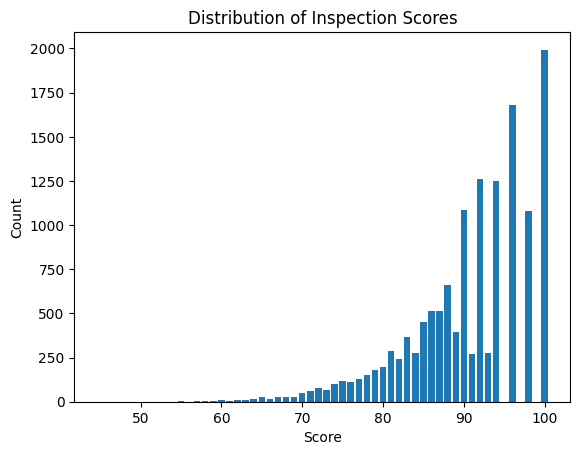

In [ ]:
#This line removes all inspections of value -1
missing_no = ins_named.drop(ins_named[ins_named['score'] == -1].index)
scores = missing_no['score'].value_counts()

plt.bar(scores.index.to_numpy(), scores.to_numpy())
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Inspection Scores');


**Step E-2:**  
In this step you will evaluate and comment (in the LMS assignment) on the qualities of the distribution of the inspections scores. 

Calculate and Comment on the following questions related to the distribution of inspection scores.  Refer to the Data Mining Intro and Statistic Primer courses in this flow for more information about the statistical measures and equations.
1. Describe the distribution shape (major peaks, clusters of values, obvious gaps, symmetry and skewness).
2. Calculate the inspection scores min, max, mean, median, standard deviation.
3. Plot the scores (without the unscored restaurants) in a box plot
4. Describe the variability using the Interquartile Range:   Calculate the IQR. Calculate the IQR Outlier low and high thresholds, and if there are any outliers.  Is IRQ a good measure to use for this distribution (why or why not)?

Make sure your code passes the doctests.

Copy/paste a screenshot of your plot into a doc and submit to the assignment post.

In [ ]:
missing_no.describe()

,score,bid,year
count,14031.000000,14031.000000,14031.000000
mean,90.646711,53104.848407,2017.908275
std,7.627331,36360.657583,0.941441
min,45.000000,19.000000,2016.000000
25%,86.000000,5977.000000,2017.000000
50%,92.000000,68026.000000,2018.000000
75%,96.000000,85370.000000,2019.000000
max,100.000000,102398.000000,2019.000000


TestResults(failed=0, attempted=8)

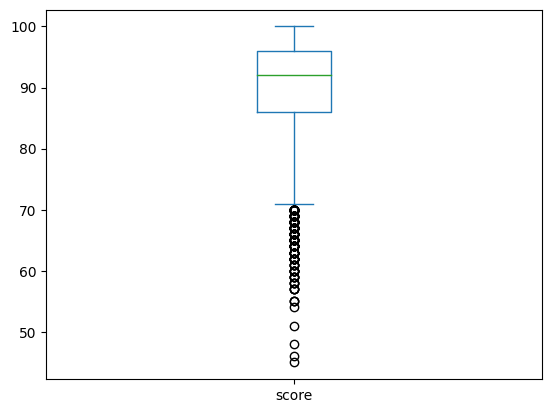

In [ ]:
#Distribution feature observations and metrics

#1.  Peaks and Cluster of values at None zand None.  Gaps at None, None, None.  Distribution is None-skewed.

#2.    
min = missing_no['score'].min()
max = missing_no['score'].max()
mean = missing_no['score'].mean()
median = missing_no['score'].median()
stdev = missing_no['score'].std()

#3
missing_no['score'].plot(kind='box')

#4
Q1 = missing_no['score'].quantile(0.25)
Q3 = missing_no['score'].quantile(0.75)
IQR = Q3 - Q1
highOutlierThresh = Q3 + (1.5*IQR)
lowOutlierThresh = Q1 - (1.5*IQR)


import doctest

"""
  >>> print(min)
  45
  >>> print(max)
  100
  >>> print(round(mean, 3))
  90.647
  >>> print(round(median, 3))
  92.0
  >>> print(round(stdev, 3))
  7.627
  >>> print(round(IQR, 3))
  10.0
  >>> print(round(highOutlierThresh, 3))
  111.0
  >>> print(round(lowOutlierThresh, 3))
  71.0


"""
doctest.testmod()

#If the distribution were normal, we'd have several outliers as shown in the box plot
#However, not good to use IQR since the distribution is not normal (see box plot)

**Step E-3:**

We are now going to create a geospatial hexbin plot, which is a visualization of some quantity for each location (in coordinates). In the context of restaurant ratings, we can choose our coordinates to be longitude and latitude, and the quantity to be inspection scores for each restaurant in San Francisco.

In order to produce this geospatial plot, we need to make sure we have all the data we need to create the plot. First, create a dataframe called `rated_geo` that includes the `longitude`, `latitude`, and `score` for each restaurant.

Since we are only concerned with the restaurants in San Francisco, make sure the latitude is roughly between `37.5` and `38`, and that the longitudes are roughly between `-122.3` and `-122.6`. Also, only keep scores above `0`.   

Make sure your code passes the doctests.

Here's what it should look like:

![alt text](https://drive.google.com/uc?id=1-iXf4wQkP0SBp5EMrSluDyk-pftJNkNn)  

Make sure your code passes the doctest.

In [ ]:
rated_geo = bus.merge(ins_named[ins_named.score > 0], how='right')

rated_geo.head()
#Update each of the columns in rated_geo
rated_geo = rated_geo[['latitude', 'longitude', 'score']]


rated_geo = rated_geo[((rated_geo['latitude'] >= 37.5) & (rated_geo['latitude'] <= 38)) & ((rated_geo['longitude'] >= -122.6) & (rated_geo['longitude'] <= -122.3))]

rated_geo


# import doctest

# """
#   >>> print(rated_geo.loc[[1], ['latitude', 'longitude', 'score']])
#       latitude   longitude  score
#   1  37.755282 -122.420493     74
#   >>> print(rated_geo.loc[[5000], ['latitude', 'longitude', 'score']])
#         latitude   longitude  score
#   5000  37.80824 -122.410189     94
#   >>> print(rated_geo.loc[[7000], ['latitude', 'longitude', 'score']])
#          latitude   longitude  score
#   7000  37.797933 -122.406018    100
# """
# doctest.testmod()

,latitude,longitude,score
16,37.755282,-122.420493,74
17,37.755282,-122.420493,76
18,37.755282,-122.420493,72
36,37.752158,-122.420362,85
37,37.752158,-122.420362,90
...,...,...,...
14026,37.756997,-122.420534,77
14027,37.756997,-122.420534,80
14028,37.756997,-122.420534,80
14029,37.794293,-122.405967,82


**Step E-4:**

Now that we have our dataframe ready, we can start creating our geospatial hexbin plot. Using the `rated_geo` dataframe, produce a geospatial hexbin plot that shows the inspection count for all restaurant lcoations in San Francisco. Your plot should look like this:

![alt text](https://drive.google.com/uc?id=1qyFs74PJ78qzPE9kmpLd3kp5dkyZ1ZJH)

Hint: Try using `plt.hexbin()` to create the hexbin plot, and look at the parameter `reduce_C_function`, which determines the function that will be applied to the scores to determine the values of each coordinate. Use `fig.colorbar()` to create the color bar to the right of the hexbin plot.  
Use the file sf.png that has been provided in the materials section of the LMS to overlay your points onto a map of San Francisco, or you can download it from [here](https://drive.google.com/file/d/1NPfLEKXcF-1_xZzx8n-WRuegQlZ9pjuE/view?usp=sharing)  

Copy/paste a screenshot of your plot into a doc and submit to the assignment post.

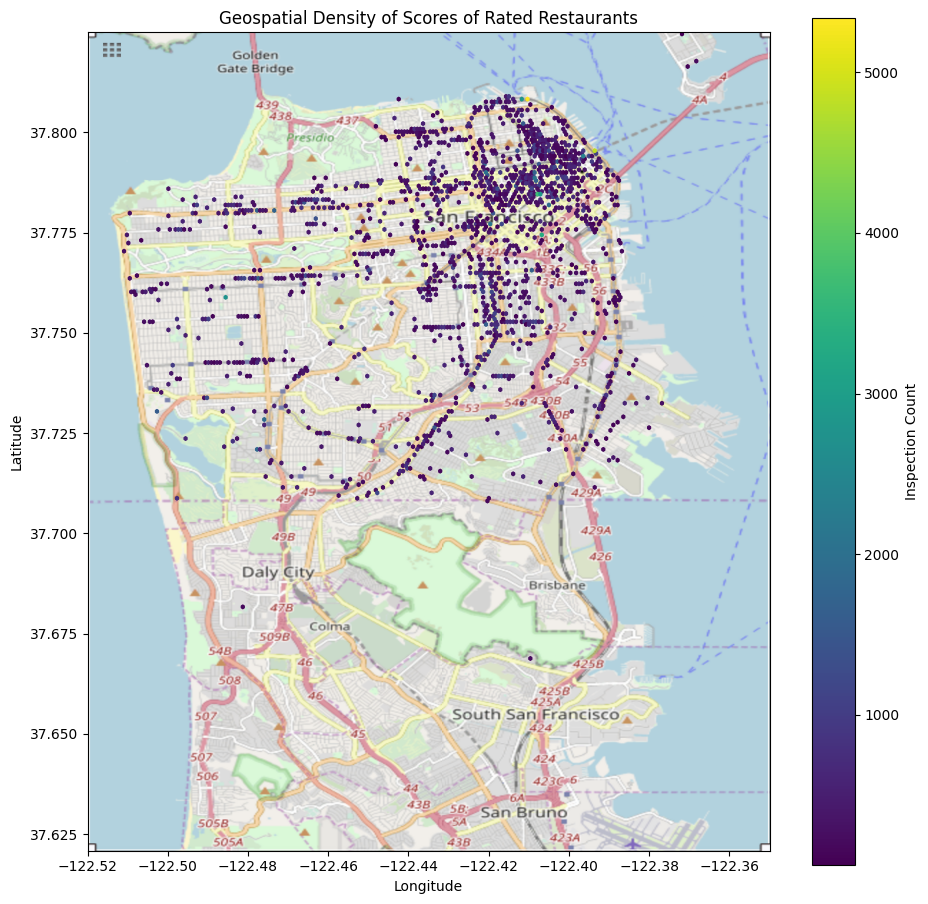

In [ ]:
from matplotlib import image
# DO NOT MODIFY THIS BLOCK
min_lon = rated_geo['longitude'].min()
max_lon = rated_geo['longitude'].max()
min_lat = rated_geo['latitude'].min()
max_lat = rated_geo['latitude'].max()
max_score = rated_geo['score'].max()
min_score = rated_geo['score'].min()
bound = ((min_lon, max_lon, min_lat, max_lat))
min_lon, max_lon, min_lat, max_lat
map_bound = ((-122.5200, -122.3500, 37.6209, 37.8249))
# DO NOT MODIFY THIS BLOCK

# Read in the base map and setting up subplot
basemap = image.imread('sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])


# Create the hexbin plot
im = plt.hexbin(rated_geo['longitude'], rated_geo['latitude'], rated_geo['score'], gridsize=200, reduce_C_function=np.sum)
cbar = fig.colorbar(im, ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Density of Scores of Rated Restaurants')
cbar.set_label('Inspection Count')

# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE

**Step E-5:**

Now that we've created our geospatial hexbin plot for the density of inspection scores for restaurants in San Francisco, let's also create another hexbin plot that visualizes the *average inspection scores* for restaurants in San Francisco. Your plot should look like this:

![alt text](https://drive.google.com/uc?id=195KMq88WILGTSx6TFQta_IHoZjughc5m)

Hint: If you set up everything correctly in the previous step, you should only need to change 1 parameter here to produce the plot.

Copy/paste a screenshot of your plot into a doc and submit to the assignment post.

In [ ]:
rated_geo.head()

,latitude,longitude,score
16,37.755282,-122.420493,74
17,37.755282,-122.420493,76
18,37.755282,-122.420493,72
36,37.752158,-122.420362,85
37,37.752158,-122.420362,90


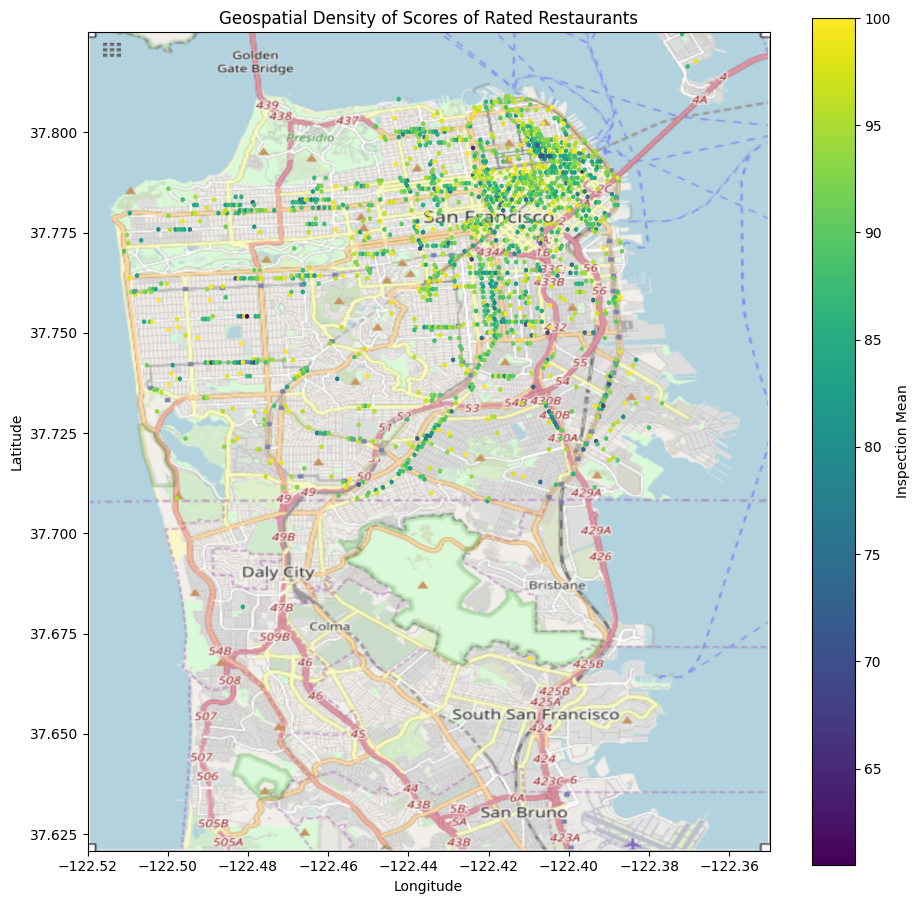

In [ ]:
# Read in the base map and setting up subplot
basemap = image.imread('sf.png')

# DO NOT MODIFY THESE LINES
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])
# DO NOT MODIFY THESE LINES

# Create the hexbin plot
im = plt.hexbin(rated_geo['longitude'], rated_geo['latitude'], rated_geo['score'], gridsize=200, reduce_C_function=np.mean)
cbar = fig.colorbar(im, ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Density of Scores of Rated Restaurants')
cbar.set_label('Inspection Mean')


# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE

**Step E-6:**

Given the 2 hexbin plots you have just created above, did you notice any connection between the first plot where we aggregate over the *inspection count* and the second plot where we aggregate over the *inspection mean*? In several sentences, comment on your observations and post to the document you have generated for this assignment (containing the previous cell request for comments and screenshots).

Here're some of the questions that might be interesting to address in your response:


*   Roughly speaking, did you notice any of the actual locations (districts/places of interest) where inspection tends to be more frequent? What about the locations where the average inspection score tends to be low?
*   Is there any connection between the locations where there are more inspections and the locations where the average inspection score is low?
*   What have might led to the connections that you've identified?


**Step E-7:**

Try making your own visualization with any of the datasets, or a combination of the two datasets!
Upload your plots and commentary into the document that you will upload to the assignment post.

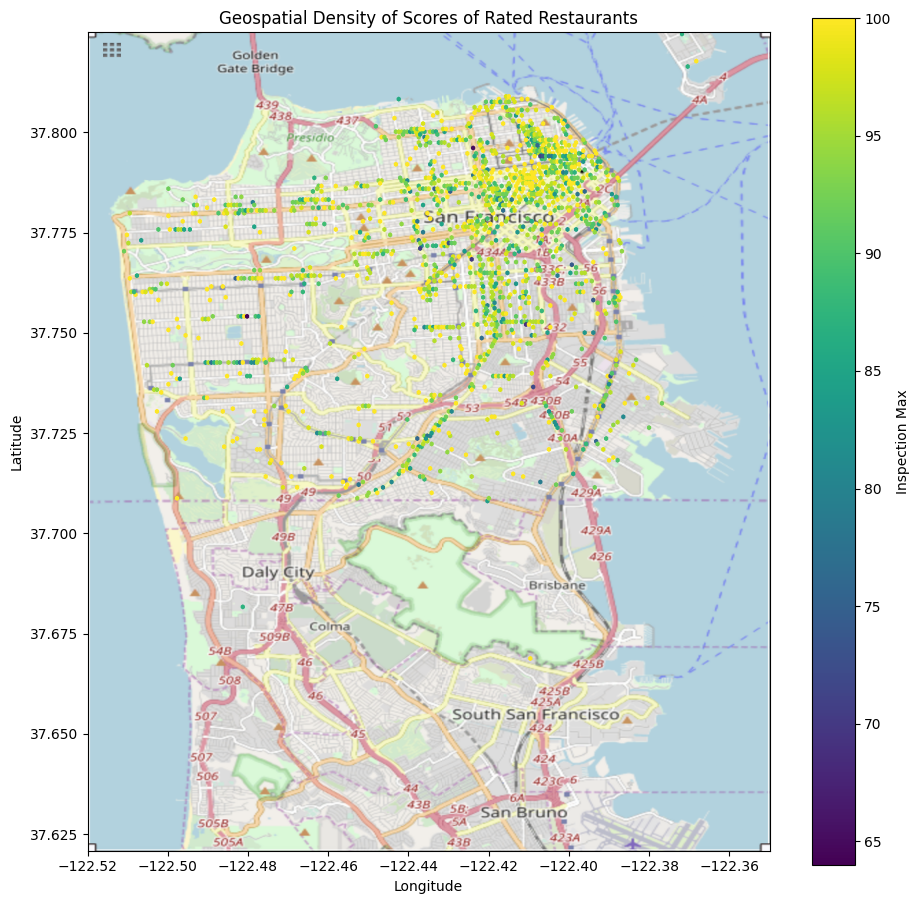

In [ ]:
# Read in the base map and setting up subplot
basemap = image.imread('sf.png')

# DO NOT MODIFY THESE LINES
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])
# DO NOT MODIFY THESE LINES

# Create the hexbin plot
im = plt.hexbin(rated_geo['longitude'], rated_geo['latitude'], rated_geo['score'], gridsize=200, reduce_C_function=np.amax)
cbar = fig.colorbar(im, ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Density of Scores of Rated Restaurants')
cbar.set_label('Inspection Max')


# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE